<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/version2/feature_engineering/TX_PCA_Analysis_SupersetData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal**

Dimensionality Reduction using PCA on NY Superset timeseries data


## Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!ls '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021'

# Import library

In [2]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting

import seaborn as sns


# Load Superset data

In [13]:
location = '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/'
all_states_data = pd.read_csv(location+'AllStates_Superset_dataset_Mar26.csv', low_memory=False)
all_states_data.head(2)

,Date,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k
0,2020-03-01,Alabama,1001,0,Autauga County,0.0,7.194,49,15.0,13.0,0.0,0.0,3.0,0.0,35.853419,Alabama,35,22,2.81,41.6,1.0,32.9,0.26,2.55,0,55601,-1.2,0.11,19,58786,19.0,2.8,48.68,19,101,3.79,0.33,0.025,0.0,0.0,37,47.1,0.0,0.0,0.0,0,0,0.0,28,0.4,3.5,3.2,0.3,0.0,0.0,0.0
1,2020-03-02,Alabama,1001,0,Autauga County,0.0,14.587,100,15.0,4.0,0.0,0.0,5.0,-1.0,35.853419,Alabama,11,13,3.33,40.9,0.5,42.0,0.80,2.53,0,55601,-1.9,0.11,19,58786,19.0,2.8,48.68,19,101,3.79,0.33,0.025,0.0,0.0,38,47.1,0.0,0.0,0.0,0,0,0.0,28,0.4,3.5,3.2,0.3,0.0,0.0,0.0


In [14]:
CA_superset_data = all_states_data[all_states_data['Province_State'] == 'Texas']
CA_superset_data.head()

,Date,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k
6111,2020-03-01,Texas,48057,0,Calhoun County,0.0,10.531,97,12.0,20.0,0.0,0.0,3.0,0.0,16.612237,Texas,33,22,3.01,32.5,0.1,45.1,0.33,2.69,0,21561,-10.5,0.48,22,55469,2.4,48.4,50.73,24,115,2.82,0.3,0.04,0.0,0.0,37,47.7,0.0,0.0,0.0,0,0,0.0,56,0.5,4.7,4.6,0.2,0.0,0.0,43.290043
6112,2020-03-02,Texas,48057,0,Calhoun County,0.0,9.906,91,18.0,14.0,0.0,0.0,12.0,0.0,16.612237,Texas,11,14,3.73,34.3,0.2,36.1,0.53,3.20,0,21561,6.5,0.48,22,55469,2.4,48.4,50.73,24,115,2.82,0.3,0.04,0.0,0.0,38,47.7,0.0,0.0,0.0,0,0,0.0,56,0.5,4.7,4.6,0.2,0.0,0.0,34.435262
6113,2020-03-03,Texas,48057,0,Calhoun County,0.0,10.828,100,15.0,12.0,0.0,0.0,8.0,0.0,16.612237,Texas,12,14,3.90,33.5,0.0,34.1,0.63,3.27,0,21561,8.8,0.48,22,55469,2.4,48.4,50.73,24,115,2.82,0.3,0.04,0.0,0.0,39,47.7,0.0,0.0,0.0,0,0,0.0,63,0.5,4.7,4.6,0.2,0.0,0.0,27.548209
6114,2020-03-04,Texas,48057,0,Calhoun County,0.0,10.086,93,13.0,3.0,0.0,0.0,6.0,0.0,16.612237,Texas,11,14,3.89,33.8,0.1,36.4,0.60,3.29,0,21561,9.5,0.48,22,55469,2.4,48.4,50.73,24,115,2.82,0.3,0.04,0.0,0.0,40,47.7,100.0,0.0,0.0,0,0,0.0,63,0.5,4.7,4.6,0.2,0.0,0.0,27.548209
6115,2020-03-05,Texas,48057,0,Calhoun County,0.0,11.330,104,13.0,12.0,0.0,0.0,5.0,0.0,16.612237,Texas,12,13,3.92,34.8,0.1,32.8,0.63,3.28,0,21561,9.2,0.48,22,55469,2.4,48.4,50.73,24,115,2.82,0.3,0.04,0.0,0.0,41,47.7,100.0,0.0,0.0,0,0,0.0,63,0.5,4.7,4.6,0.2,0.0,0.0,20.661157


In [15]:
print(CA_superset_data.shape)
print(CA_superset_data.Date.min())
print(CA_superset_data.Date.max())


(51965, 56)
2020-03-01
2020-12-28


## Factor Plot

In [16]:
df_superset_data_filtered1 = CA_superset_data[(CA_superset_data['Date'] >= '2020-04-01') & (CA_superset_data['Date'] < '2020-07-01')]
print(df_superset_data_filtered1.shape)


(16611, 56)


## Preprocessing: Convert 'date' as index column before applying PCA

In [17]:
CA_superset_data['Date'] = pd.to_datetime(CA_superset_data['Date'], format='%Y-%m-%d') 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
CA_superset_data = CA_superset_data.set_index('Date')
CA_superset_data.head()

,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,Texas,48057,0,Calhoun County,0.0,10.531,97,12.0,20.0,0.0,0.0,3.0,0.0,16.612237,Texas,33,22,3.01,32.5,0.1,45.1,0.33,2.69,0,21561,-10.5,0.48,22,55469,2.4,48.4,50.73,24,115,2.82,0.3,0.04,0.0,0.0,37,47.7,0.0,0.0,0.0,0,0,0.0,56,0.5,4.7,4.6,0.2,0.0,0.0,43.290043
2020-03-02,Texas,48057,0,Calhoun County,0.0,9.906,91,18.0,14.0,0.0,0.0,12.0,0.0,16.612237,Texas,11,14,3.73,34.3,0.2,36.1,0.53,3.20,0,21561,6.5,0.48,22,55469,2.4,48.4,50.73,24,115,2.82,0.3,0.04,0.0,0.0,38,47.7,0.0,0.0,0.0,0,0,0.0,56,0.5,4.7,4.6,0.2,0.0,0.0,34.435262
2020-03-03,Texas,48057,0,Calhoun County,0.0,10.828,100,15.0,12.0,0.0,0.0,8.0,0.0,16.612237,Texas,12,14,3.90,33.5,0.0,34.1,0.63,3.27,0,21561,8.8,0.48,22,55469,2.4,48.4,50.73,24,115,2.82,0.3,0.04,0.0,0.0,39,47.7,0.0,0.0,0.0,0,0,0.0,63,0.5,4.7,4.6,0.2,0.0,0.0,27.548209
2020-03-04,Texas,48057,0,Calhoun County,0.0,10.086,93,13.0,3.0,0.0,0.0,6.0,0.0,16.612237,Texas,11,14,3.89,33.8,0.1,36.4,0.60,3.29,0,21561,9.5,0.48,22,55469,2.4,48.4,50.73,24,115,2.82,0.3,0.04,0.0,0.0,40,47.7,100.0,0.0,0.0,0,0,0.0,63,0.5,4.7,4.6,0.2,0.0,0.0,27.548209
2020-03-05,Texas,48057,0,Calhoun County,0.0,11.330,104,13.0,12.0,0.0,0.0,5.0,0.0,16.612237,Texas,12,13,3.92,34.8,0.1,32.8,0.63,3.28,0,21561,9.2,0.48,22,55469,2.4,48.4,50.73,24,115,2.82,0.3,0.04,0.0,0.0,41,47.7,100.0,0.0,0.0,0,0,0.0,63,0.5,4.7,4.6,0.2,0.0,0.0,20.661157


## Group the data

In [19]:
CA_superset_data.columns

Index(['Province_State', 'FIPS', 'New cases', 'County Name',
       'mask_rule_severity', 'm50', 'm50_index',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'PopDensity', 'State_Name',
       'Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Employment.density',
       'X..hot.spots.1000.people', 'Hospital.beds.1000.people',
       'ICUs.1000.people', 'X..contact.tracing.wo

In [20]:
x_col_demographics = ['FIPS','PopDensity','X..people.older.than.60',
                      'Median.income', 'X..African.Americans',
                      'X..Hispanic.Americans', 'X..Male','New Cases/100k population']

In [21]:
#['growth_code', 'positivity_rate']
x_col_hospitalization_testing = ['Hospital.beds.1000.people',
       'ICUs.1000.people', 
       'X..hospital.bed.utilization',
       'Testing.capacity', 'Tests.done.1000.people', 'X..ICU.utilization',
       'Ventilator.shortage',#'positivity_rate',
       'rolling_avg_new_cases/100k'	#,'growth_code'
       ,'New Cases/100k population'] #'X..contact.tracing.workers.1000.people',

In [22]:
x_col_mobility = ['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'X..staying.home', 'Trips.person', 'X..out.of.county.trips',
       'X..out.of.state.trips', 'Miles.person', 'Work.trips.person',
       'Non.work.trips.person','X..working.from.home','New Cases/100k population']

In [23]:
x_col_socialdistancing = ['m50', 'm50_index','Social.distancing.index','New Cases/100k population']

In [24]:
x_col_maskrule = ['mask_rule_severity','New Cases/100k population']

# PCA: Demographic Group

In [25]:
CA_superset_data_filtered = CA_superset_data[x_col_demographics]
CA_superset_data_filtered.head()

,FIPS,PopDensity,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,New Cases/100k population
Date,,,,,,,,
2020-03-01,48057,16.612237,22,55469,2.4,48.4,50.73,0.0
2020-03-02,48057,16.612237,22,55469,2.4,48.4,50.73,0.0
2020-03-03,48057,16.612237,22,55469,2.4,48.4,50.73,0.0
2020-03-04,48057,16.612237,22,55469,2.4,48.4,50.73,0.0
2020-03-05,48057,16.612237,22,55469,2.4,48.4,50.73,0.0


In [26]:
print(CA_superset_data_filtered.shape)
CA_superset_data_filtered = CA_superset_data_filtered.dropna()
print(CA_superset_data_filtered.shape)

(51965, 8)
(51965, 8)


## Correlation Plot

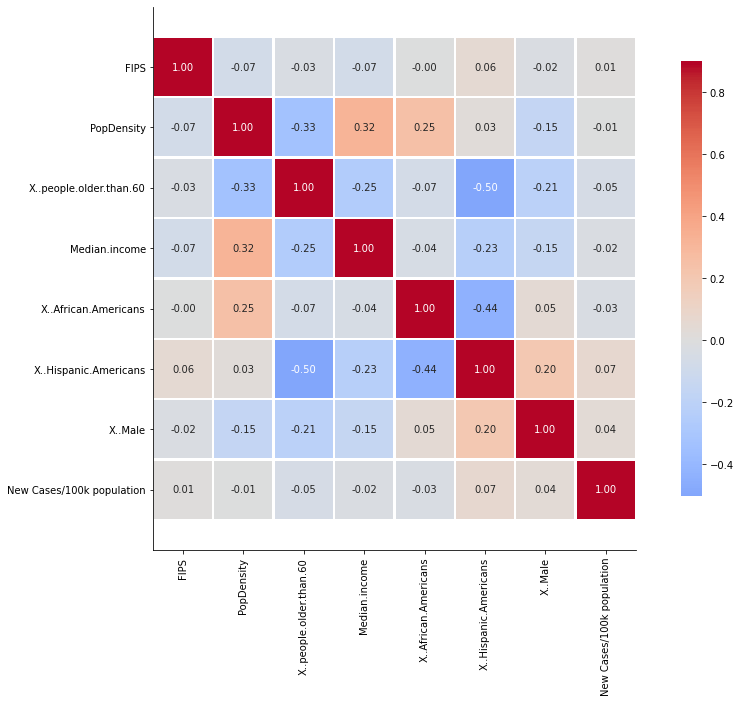

In [27]:

corr = CA_superset_data_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

## Standardizing the data

In [28]:
X = CA_superset_data_filtered.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Apply PCA

In [29]:
pca = PCA()
X_pca = pca.fit(X_std)

## Determine the number of components

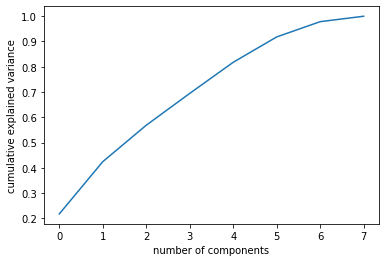

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Dimensionality Reduction

In [31]:
num_components = 6
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Important feature set

In [32]:
pd.DataFrame(pca.components_, columns = CA_superset_data_filtered.columns)


,FIPS,PopDensity,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,New Cases/100k population
0,0.067137,0.078553,-0.555710,-0.044296,-0.309140,0.680913,0.319106,0.132312
1,-0.110822,0.628799,-0.402010,0.534196,0.320321,-0.129420,-0.158368,-0.030291
2,0.081309,0.010339,-0.141303,-0.367618,0.689759,-0.122976,0.585249,0.069025
3,-0.951066,-0.067324,0.056638,0.054433,-0.086961,-0.023153,0.275154,0.031022
4,0.009918,0.008434,0.063546,0.040920,0.005345,-0.089138,-0.102012,0.987794
5,-0.233211,0.378531,0.045096,-0.646411,0.175767,0.295593,-0.513963,-0.004369


In [33]:

n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = CA_superset_data_filtered.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [34]:
most_important_names

['X..Hispanic.Americans',
 'PopDensity',
 'X..African.Americans',
 'FIPS',
 'New Cases/100k population',
 'Median.income']

In [35]:
print(" initial_feature_names : ",initial_feature_names)

print("most_important_names: ", most_important_names)

print(len(initial_feature_names) - len(most_important_names))

 initial_feature_names :  Index(['FIPS', 'PopDensity', 'X..people.older.than.60', 'Median.income',
       'X..African.Americans', 'X..Hispanic.Americans', 'X..Male',
       'New Cases/100k population'],
      dtype='object')
most_important_names:  ['X..Hispanic.Americans', 'PopDensity', 'X..African.Americans', 'FIPS', 'New Cases/100k population', 'Median.income']
2


# PCA: Hospitalization and testing  Group

In [36]:
CA_superset_data_filtered = CA_superset_data[x_col_hospitalization_testing]
CA_superset_data_filtered.head()

,Hospital.beds.1000.people,ICUs.1000.people,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,rolling_avg_new_cases/100k,New Cases/100k population
Date,,,,,,,,,
2020-03-01,2.82,0.3,47.7,0.0,0.0,0.0,0,43.290043,0.0
2020-03-02,2.82,0.3,47.7,0.0,0.0,0.0,0,34.435262,0.0
2020-03-03,2.82,0.3,47.7,0.0,0.0,0.0,0,27.548209,0.0
2020-03-04,2.82,0.3,47.7,100.0,0.0,0.0,0,27.548209,0.0
2020-03-05,2.82,0.3,47.7,100.0,0.0,0.0,0,20.661157,0.0


In [37]:
print(CA_superset_data_filtered.shape)
CA_superset_data_filtered = CA_superset_data_filtered.dropna()
print(CA_superset_data_filtered.shape)

(51965, 9)
(51965, 9)


## Correlation Plot

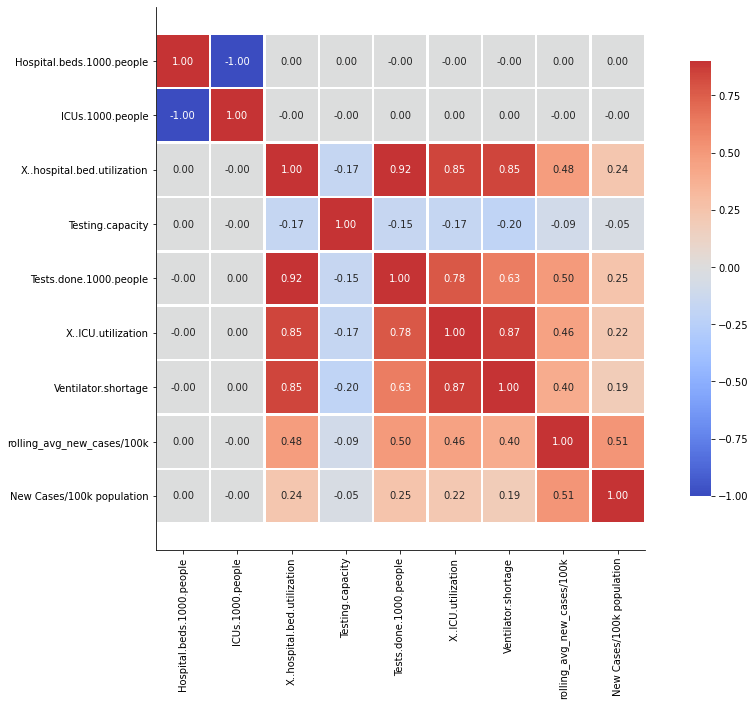

In [38]:

corr = CA_superset_data_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

## Standardizing the data

In [39]:
X = CA_superset_data_filtered.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Apply PCA

In [40]:
pca = PCA()
X_pca = pca.fit(X_std)

## Determine the number of components

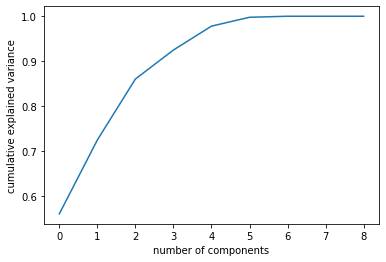

In [41]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Dimensionality Reduction

In [42]:
num_components = 5
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Important feature set

In [43]:
pd.DataFrame(pca.components_, columns = CA_superset_data_filtered.columns)


,Hospital.beds.1000.people,ICUs.1000.people,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,rolling_avg_new_cases/100k,New Cases/100k population
0,0.0,0.000000e+00,0.479639,-0.121888,0.447878,0.462600,0.439534,0.326847,0.201191
1,0.0,1.752071e-16,-0.159595,0.205717,-0.086530,-0.178218,-0.226031,0.520622,0.755529
2,0.0,4.705437e-17,-0.111576,-0.968693,-0.102804,-0.098669,-0.048364,0.053281,0.153957
3,-0.0,3.630044e-17,-0.014618,0.047140,-0.264068,0.170626,0.359542,-0.671514,0.564374
4,0.0,1.322786e-16,-0.234768,0.038349,-0.651904,0.200982,0.513914,0.409238,-0.215538


In [44]:

n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = CA_superset_data_filtered.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [45]:
most_important_names

['X..hospital.bed.utilization',
 'New Cases/100k population',
 'Testing.capacity',
 'rolling_avg_new_cases/100k',
 'Tests.done.1000.people']

In [46]:
print(" initial_feature_names : ",initial_feature_names)

print("most_important_names: ", most_important_names)

print(len(initial_feature_names) - len(most_important_names))

 initial_feature_names :  Index(['Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'rolling_avg_new_cases/100k', 'New Cases/100k population'],
      dtype='object')
most_important_names:  ['X..hospital.bed.utilization', 'New Cases/100k population', 'Testing.capacity', 'rolling_avg_new_cases/100k', 'Tests.done.1000.people']
4


# PCA: Mobility Group

In [47]:
CA_superset_data_filtered = CA_superset_data[x_col_mobility]
CA_superset_data_filtered.head()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,X..working.from.home,New Cases/100k population
Date,,,,,,,,,,,,,,,
2020-03-01,12.0,20.0,0.0,0.0,3.0,0.0,22,3.01,32.5,0.1,45.1,0.33,2.69,4.6,0.0
2020-03-02,18.0,14.0,0.0,0.0,12.0,0.0,14,3.73,34.3,0.2,36.1,0.53,3.20,4.6,0.0
2020-03-03,15.0,12.0,0.0,0.0,8.0,0.0,14,3.90,33.5,0.0,34.1,0.63,3.27,4.6,0.0
2020-03-04,13.0,3.0,0.0,0.0,6.0,0.0,14,3.89,33.8,0.1,36.4,0.60,3.29,4.6,0.0
2020-03-05,13.0,12.0,0.0,0.0,5.0,0.0,13,3.92,34.8,0.1,32.8,0.63,3.28,4.6,0.0


In [48]:
print(CA_superset_data_filtered.shape)
CA_superset_data_filtered = CA_superset_data_filtered.dropna()
print(CA_superset_data_filtered.shape)

(51965, 15)
(51965, 15)


## Correlation Plot

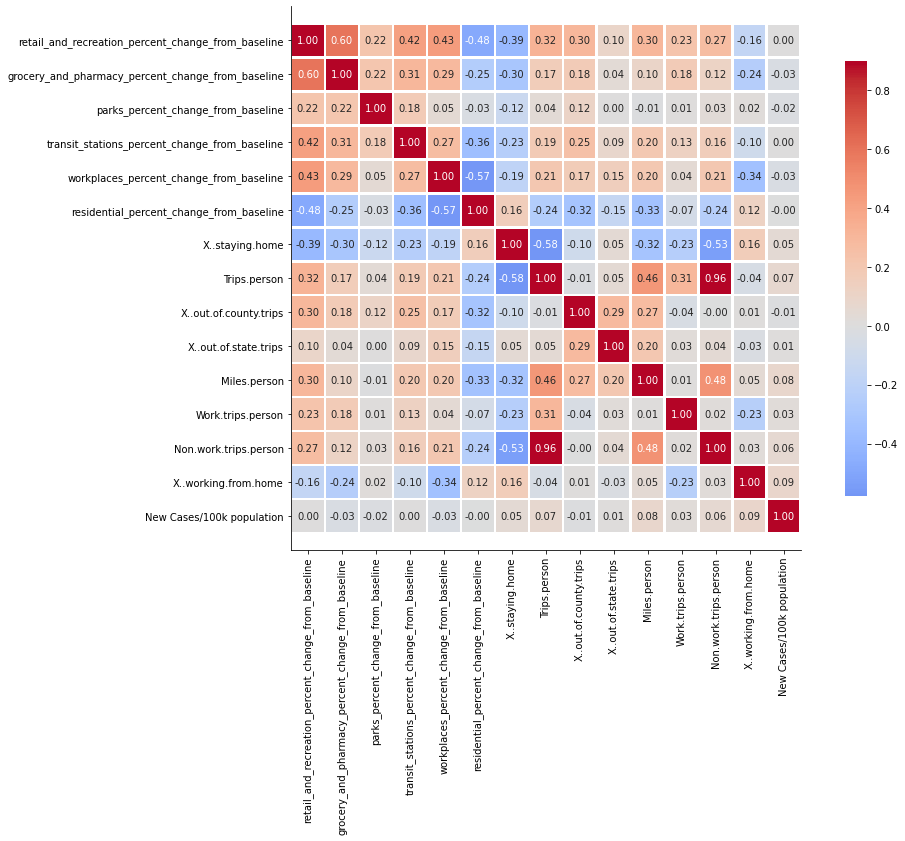

In [49]:

corr = CA_superset_data_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

## Standardizing the data

In [50]:
X = CA_superset_data_filtered.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Apply PCA

In [51]:
pca = PCA()
X_pca = pca.fit(X_std)

## Determine the number of components

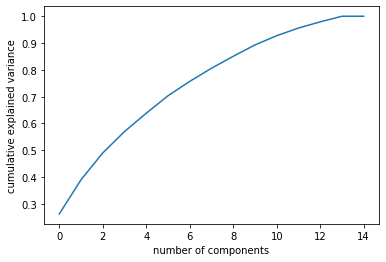

In [52]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Dimensionality Reduction

In [53]:
num_components = 12
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Important feature set

In [54]:
pd.DataFrame(pca.components_, columns = CA_superset_data_filtered.columns)


,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,X..working.from.home,New Cases/100k population
0,0.380319,0.279234,0.101428,0.269960,0.292403,-0.316420,-0.325535,0.359125,0.177826,0.099934,0.290322,0.145016,0.333041,-0.125436,0.008887
1,-0.214072,-0.258756,-0.143812,-0.208035,-0.250609,0.225489,-0.240010,0.463894,-0.297636,-0.153246,0.188909,0.025425,0.480014,0.213818,0.110772
2,-0.086327,-0.264911,-0.094377,0.016439,0.010445,-0.204902,0.216267,-0.047408,0.395918,0.389661,0.368508,-0.417596,0.078826,0.414287,0.159567
3,0.155119,0.217870,0.642506,0.199409,-0.376589,0.224045,-0.117049,-0.043090,0.144088,-0.191689,-0.043861,-0.105304,-0.012881,0.439988,0.063597
4,0.046137,0.035801,-0.081413,0.051254,-0.185891,0.104966,0.088434,0.017300,0.066097,0.273913,0.004500,0.542169,-0.148860,-0.008157,0.733520
5,0.086162,0.039669,-0.051772,0.095438,0.280403,-0.276475,0.154370,-0.057209,-0.262447,-0.548046,-0.077340,-0.327438,0.040729,0.080859,0.553552
6,-0.111438,-0.001367,0.567478,-0.324011,0.255686,0.138999,0.047828,0.064585,-0.207801,0.402662,-0.082214,-0.270199,0.151143,-0.332361,0.225872
7,0.161074,0.460322,-0.312437,-0.450891,-0.152638,0.268906,-0.248197,-0.125471,0.286290,-0.095044,0.167328,-0.325713,-0.031529,-0.190626,0.160845
8,-0.307622,-0.359217,0.079298,0.434801,-0.093345,0.162233,-0.258104,-0.062120,0.331783,-0.210849,0.115575,-0.151119,-0.018806,-0.511364,0.151336
9,0.008545,0.293487,-0.301560,0.569706,-0.107592,0.279571,0.034172,0.008678,-0.358636,0.366160,-0.148057,-0.332001,0.111448,-0.005350,0.004706


In [55]:

n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = CA_superset_data_filtered.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [56]:
most_important_names

['retail_and_recreation_percent_change_from_baseline',
 'Non.work.trips.person',
 'Work.trips.person',
 'parks_percent_change_from_baseline',
 'New Cases/100k population',
 'New Cases/100k population',
 'parks_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'X..working.from.home',
 'transit_stations_percent_change_from_baseline',
 'Miles.person',
 'X..staying.home']

In [57]:
print(" initial_feature_names : ",initial_feature_names)

print("most_important_names: ", most_important_names)

print(len(initial_feature_names) - len(most_important_names))

 initial_feature_names :  Index(['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'X..staying.home',
       'Trips.person', 'X..out.of.county.trips', 'X..out.of.state.trips',
       'Miles.person', 'Work.trips.person', 'Non.work.trips.person',
       'X..working.from.home', 'New Cases/100k population'],
      dtype='object')
most_important_names:  ['retail_and_recreation_percent_change_from_baseline', 'Non.work.trips.person', 'Work.trips.person', 'parks_percent_change_from_baseline', 'New Cases/100k population', 'New Cases/100k population', 'parks_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'X..working.from.home', 'transit_stations_percent_change_from_baseline', 'Miles.person', 'X..st

# Conclusion for superset dataset analysis:

From the above PCA analysis, we can drop the following columns from Time-series forecasting

1. Demographic Group:
>* 'X..people.older.than.60', 
>* 'Median.income', 
>* 'X..Male', 
>* 'New cases/100k',
>* 'FIPS', 
>* 'X..African.Americans', 
>* 'PopDensity'

2. Hospitalization and testing Group:
>* 'X..hospital.bed.utilization',
>* 'positivity_rate',
>* 'Ventilator.shortage',
>* 'positivity_rate',
>* 'Testing.capacity',
>* 'growth_code',
>* 'rolling_avg_new_cases/100k'

3. Mobility Group:
>* 'retail_and_recreation_percent_change_from_baseline',
>* 'Trips.person',
>* 'X..working.from.home',
>* 'parks_percent_change_from_baseline',
>* 'X..out.of.county.trips',
>* 'New cases/100k',
>* 'X..out.of.state.trips',
>* 'X..working.from.home',
>* 'Miles.person',
>* 'grocery_and_pharmacy_percent_change_from_baseline',
>* 'transit_stations_percent_change_from_baseline',
>* 'retail_and_recreation_percent_change_from_baseline'

# Applying for the whole dataset

## Standardizing the data

In [64]:
CA_superset_data.head(2)

,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,Texas,48057,0,Calhoun County,0.0,10.531,97,12.0,20.0,0.0,0.0,3.0,0.0,16.612237,Texas,33,22,3.01,32.5,0.1,45.1,0.33,2.69,0,21561,-10.5,0.48,22,55469,2.4,48.4,50.73,24,115,2.82,0.3,0.04,0.0,0.0,37,47.7,0.0,0.0,0.0,0,0,0.0,56,0.5,4.7,4.6,0.2,0.0,0.0,43.290043
2020-03-02,Texas,48057,0,Calhoun County,0.0,9.906,91,18.0,14.0,0.0,0.0,12.0,0.0,16.612237,Texas,11,14,3.73,34.3,0.2,36.1,0.53,3.20,0,21561,6.5,0.48,22,55469,2.4,48.4,50.73,24,115,2.82,0.3,0.04,0.0,0.0,38,47.7,0.0,0.0,0.0,0,0,0.0,56,0.5,4.7,4.6,0.2,0.0,0.0,34.435262


In [65]:
numeric_cols = ['FIPS','mask_rule_severity','m50_index','retail_and_recreation_percent_change_from_baseline',
                'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
                'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
                'residential_percent_change_from_baseline','PopDensity','Social.distancing.index',
                'X..staying.home','Trips.person','X..out.of.county.trips',	'X..out.of.state.trips',
                'Miles.person',	'Work.trips.person','Non.work.trips.person','X..change.in.consumption',
                'Transit.mode.share','X..people.older.than.60',	'Median.income',	'X..African.Americans',
                'X..Hispanic.Americans',	'X..Male','Employment.density',	'X..hot.spots.1000.people',
                'Hospital.beds.1000.people',	'ICUs.1000.people',
                'New.cases.1000.people',	'Active.cases.1000.people',	'X.days..decreasing.COVID.cases',
                'X..hospital.bed.utilization',	'Testing.capacity',	'Tests.done.1000.people',	'X..ICU.utilization',
                'Ventilator.shortage',	'Imported.COVID.cases',	'COVID.exposure.1000.people',	'X.days..decreasing.ILI.cases',
                'Unemployment.claims.1000.people',	'Unemployment.rate',	'X..working.from.home',
                'Cumulative.inflation.rate'	,'COVID.death.rate' ,#'growth_code',
                #'New cases/100k',	'positivity_rate',	
                'New Cases/100k population',
                'rolling_avg_new_cases/100k']

In [66]:
CA_superset_data_filtered = CA_superset_data[numeric_cols]

In [67]:
CA_superset_data_filtered.head(2)

,FIPS,mask_rule_severity,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,48057,0.0,97,12.0,20.0,0.0,0.0,3.0,0.0,16.612237,33,22,3.01,32.5,0.1,45.1,0.33,2.69,-10.5,0.48,22,55469,2.4,48.4,50.73,24,115,2.82,0.3,0.0,0.0,37,47.7,0.0,0.0,0.0,0,0,0.0,56,0.5,4.7,4.6,0.2,0.0,0.0,43.290043
2020-03-02,48057,0.0,91,18.0,14.0,0.0,0.0,12.0,0.0,16.612237,11,14,3.73,34.3,0.2,36.1,0.53,3.20,6.5,0.48,22,55469,2.4,48.4,50.73,24,115,2.82,0.3,0.0,0.0,38,47.7,0.0,0.0,0.0,0,0,0.0,56,0.5,4.7,4.6,0.2,0.0,0.0,34.435262


In [68]:
print(CA_superset_data_filtered.shape)
CA_superset_data_filtered = CA_superset_data_filtered.dropna()
print(CA_superset_data_filtered.shape)

(51965, 47)
(51965, 47)


In [69]:
X = CA_superset_data_filtered.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Apply PCA

In [70]:
pca = PCA()
X_pca = pca.fit(X_std)

## Determine the number of components

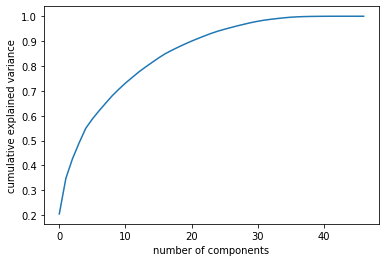

In [71]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Dimensionality Reduction

In [72]:
num_components = 30
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Important feature set

In [73]:
pd.DataFrame(pca.components_, columns = CA_superset_data_filtered.columns)


,FIPS,mask_rule_severity,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k
0,0.004551,-1.110223e-16,0.104203,0.087902,0.011976,0.009364,0.067372,0.042551,-0.055977,-0.026022,-0.137956,-0.056380,0.163471,0.034715,0.010812,0.153292,0.013677,0.167717,0.173410,-0.022726,0.007328,-0.012656,0.000794,-0.003469,0.012761,-0.022491,-0.007096,-0.000000e+00,-0.000000e+00,0.136432,0.287028,-0.098075,0.279365,-0.001353,0.289387,0.273222,0.240342,0.069699,0.278276,0.303156,-0.271085,-0.180822,0.065129,0.251024,-0.207812,0.101295,0.177462
1,-0.011653,-0.000000e+00,-0.162896,-0.254924,-0.213726,-0.061484,-0.198821,-0.221400,0.233508,0.219906,0.263413,0.245339,-0.204883,-0.121570,-0.064549,-0.155544,-0.130291,-0.175351,-0.163221,0.190477,-0.148993,0.105100,0.025280,0.067480,-0.047747,0.201421,0.005878,-0.000000e+00,-0.000000e+00,0.086859,0.139158,-0.162182,0.138280,-0.166941,0.117158,0.127323,0.132552,0.185278,0.114168,0.085705,0.048735,0.111514,0.168898,0.000390,0.049096,0.055808,0.097510
2,-0.032453,3.469447e-17,0.113549,0.032111,0.089621,0.092461,-0.089366,0.042150,0.138233,0.389821,-0.136936,-0.119222,0.093393,-0.142459,-0.040978,-0.037322,0.037304,0.086734,0.140015,0.323991,-0.159888,0.164915,0.153035,-0.035320,-0.093128,0.376624,0.077434,-0.000000e+00,-0.000000e+00,-0.082330,-0.085037,0.110436,-0.087894,0.228048,-0.061986,-0.076543,-0.097962,0.294343,-0.059254,-0.026075,-0.116990,-0.218443,-0.215938,0.109857,-0.160650,-0.064463,-0.094843
3,0.057638,-6.245005e-17,0.040707,-0.085144,-0.101567,-0.045322,-0.120525,-0.169228,0.115236,0.017299,-0.206560,-0.237544,0.349122,-0.189749,-0.086267,0.120254,0.047276,0.352595,0.283684,0.035987,-0.220878,-0.049333,0.021051,0.193164,0.108121,0.018338,-0.228659,7.523164e-37,-0.000000e+00,0.015475,-0.040924,-0.181621,-0.028079,-0.190835,-0.060321,-0.006913,0.032044,-0.000729,-0.072990,-0.049822,0.078536,0.223917,0.202536,-0.176851,0.254438,0.012197,-0.005593
4,0.082017,-4.163336e-17,-0.025999,-0.131113,-0.111485,-0.220733,-0.098617,0.056594,-0.023649,-0.071406,0.115915,0.113232,0.009589,-0.190714,-0.044295,0.051558,0.092586,-0.018464,-0.122403,-0.010678,-0.287084,-0.183198,-0.185805,0.449616,0.204205,-0.065048,-0.304141,0.000000e+00,0.000000e+00,0.127402,-0.050654,0.189383,-0.046972,0.207554,-0.011682,-0.056545,-0.097823,-0.114622,0.000761,-0.014183,-0.034803,-0.198966,-0.241884,0.137014,-0.203718,0.100330,0.131870
5,-0.078192,-8.326673e-17,0.087522,0.130257,0.160339,0.086890,0.001648,0.026612,-0.044733,0.089406,-0.067181,0.003109,-0.017142,0.038650,0.141305,-0.023823,0.179278,-0.073270,-0.015129,0.077636,0.012490,-0.055876,0.042287,-0.036455,0.064782,0.113037,0.142906,0.000000e+00,2.019484e-28,0.514357,-0.054188,0.007453,-0.054512,0.013070,-0.058022,-0.070160,-0.062014,0.047986,-0.051754,-0.065305,0.049737,0.122096,-0.024733,-0.155628,0.117046,0.526927,0.430408
6,-0.084109,3.794708e-17,0.024320,-0.023868,-0.146528,-0.026877,-0.116313,0.181628,-0.223872,0.101608,0.095022,0.132030,0.008943,0.3

In [75]:

n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = CA_superset_data_filtered.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [76]:
most_important_names

['X.days..decreasing.ILI.cases',
 'Social.distancing.index',
 'PopDensity',
 'Non.work.trips.person',
 'X..Hispanic.Americans',
 'New Cases/100k population',
 'X..out.of.state.trips',
 'Median.income',
 'X..African.Americans',
 'Work.trips.person',
 'X..African.Americans',
 'm50_index',
 'FIPS',
 'parks_percent_change_from_baseline',
 'X..Male',
 'm50_index',
 'Ventilator.shortage',
 'transit_stations_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'Testing.capacity',
 'workplaces_percent_change_from_baseline',
 'New Cases/100k population',
 'Transit.mode.share',
 'Transit.mode.share',
 'Miles.person',
 'retail_and_recreation_percent_change_from_baseline',
 'rolling_avg_new_cases/100k',
 'rolling_avg_new_cases/100k',
 'Imported.COVID.cases',
 'X..hot.spots.1000.people']

## Conclusion


 * 'X.days..decreasing.ILI.cases',
 * 'Social.distancing.index',
 * 'PopDensity',
 * 'Non.work.trips.person',
 * 'X..Hispanic.Americans',
 * 'New Cases/100k population',
 * 'X..out.of.state.trips',
 * 'Median.income',
 * 'X..African.Americans',
 * 'Work.trips.person',
 * 'X..African.Americans',
 * 'm50_index',
 * 'FIPS',
 * 'parks_percent_change_from_baseline',
 * 'X..Male',
 * 'm50_index',
 * 'Ventilator.shortage',
 * 'transit_stations_percent_change_from_baseline',
 * 'transit_stations_percent_change_from_baseline',
 * 'Testing.capacity',
 * 'workplaces_percent_change_from_baseline',
 * 'New Cases/100k population',
 * 'Transit.mode.share',
 * 'Transit.mode.share',
 * 'Miles.person',
 * 'retail_and_recreation_percent_change_from_baseline',
 * 'rolling_avg_new_cases/100k',
 * 'rolling_avg_new_cases/100k',
 * 'Imported.COVID.cases',
 * 'X..hot.spots.1000.people'

# Reference

* https://medium.com/@ansjin/dimensionality-reduction-using-pca-on-multivariate-timeseries-data-b5cc07238dc4